# Fish

## 1. Importing Libraries

In [246]:
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import numpy as np
import pandas as pd 

# For Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


## 2. Loading Data

In [247]:
data = pd.read_csv('Fish.csv')

In [248]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [249]:
data.shape

(159, 7)

# 3. Data Preprocessing

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [251]:
data.columns = ['Species', 'Weight', 'vertical_length', 'diagonal_length', 'cross_length' ,'Height', 'Width']
data.head()

,Species,Weight,vertical_length,diagonal_length,cross_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


There is no missing values

# 4. Analysis and Visualization  

In [252]:
data.describe() 

,Weight,vertical_length,diagonal_length,cross_length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


There is a zero-weight fish, we will drop this row 

In [253]:
data[ data['Weight'] == 0]

,Species,Weight,vertical_length,diagonal_length,cross_length,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [254]:
data.drop(40, inplace=True)
data[ data['Weight'] == 0]

,Species,Weight,vertical_length,diagonal_length,cross_length,Height,Width


## Species

In [255]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

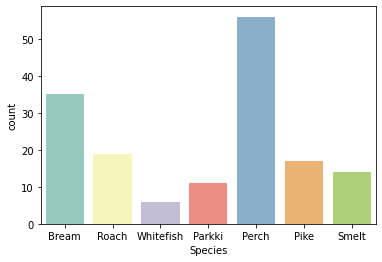

In [256]:
sns.countplot(data = data, x = 'Species', palette = 'Set3')

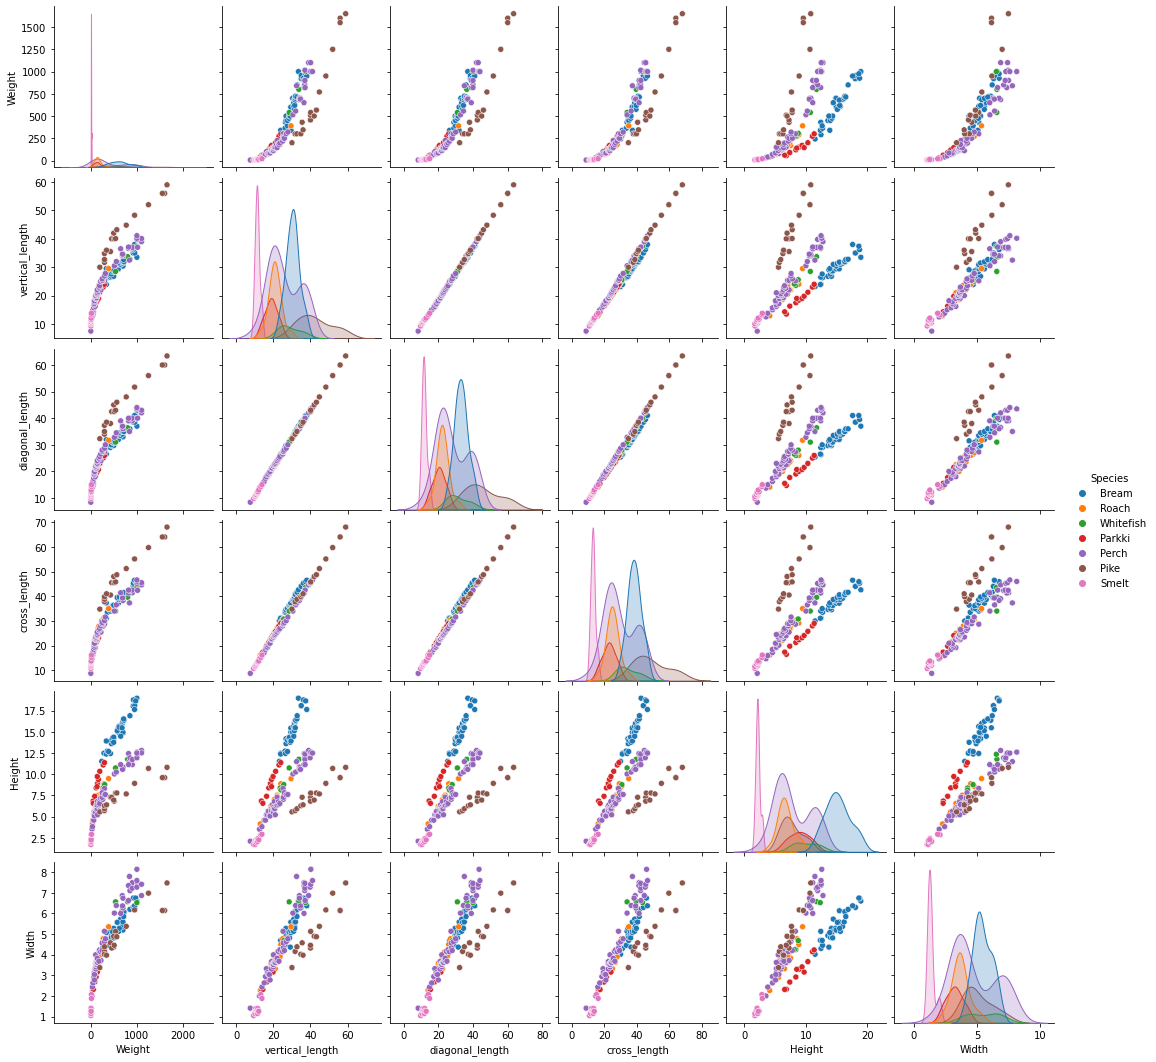

In [257]:
sns.pairplot(data, hue = 'Species')

# 5. Modeling

In [258]:
data.corr()['Weight']

Weight             1.000000
vertical_length    0.915719
diagonal_length    0.918603
cross_length       0.923090
Height             0.723857
Width              0.886654
Name: Weight, dtype: float64

## 5.1 Prepare Data for modeling

Convert `Species` to Dummy variables

In [259]:
hot_enc = pd.get_dummies(data['Species'])
data.drop(['Species'], axis = 1, inplace = True)
data = data.join(hot_enc)

### To avoid Dummy variable trap

In [260]:
data.drop(['Whitefish'], axis = 1, inplace = True)
data.head()

,Weight,vertical_length,diagonal_length,cross_length,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0


### Data Splitting

In [261]:
# Feature scaling
sc = StandardScaler()
sc_data = pd.DataFrame( sc.fit_transform(data), columns=data.columns)

In [262]:
X = sc_data.drop('Weight', axis = 1)
X = sc_data.drop(['cross_length', 'diagonal_length'], axis = 1)
y = sc_data['Weight']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = .2, random_state = 42)

## 5.2 Explore models

In [264]:
results = {}

### 1. Linear Regression

In [265]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1, solver="cholesky")
lasso_reg = Lasso(alpha = .1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
models = { 'Linear Regression' : lin_reg,
            'Ridge Regression' : ridge_reg,
            'Lasso Regression' : lasso_reg,
            'Elastic Regression' : elastic_net }

In [266]:
for name, model in models.items():
    # Fitting
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test) * 100
    results[name] = score
    
    print('The Score of {} = {:.2f}'.format(name, score))

The Score of Linear Regression = 100.00
The Score of Ridge Regression = 99.96
The Score of Lasso Regression = 98.93
The Score of Elastic Regression = 98.74


## 2. Support Vector Machine

In [267]:
svr = SVR(kernel='rbf', C = 100)
svr.fit(X_train, y_train)

SVR(C=100)

In [268]:
score = svr.score(X_test,y_test) * 100
results['Support Vector Regression'] = score
print('The Score of {} = {:.2f}'.format('Support Vector Regression', score))

The Score of Support Vector Regression = 98.00


## 3. Descision Tree Regression

In [269]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [270]:
score = dtr.score(X_test,y_test) * 100
results['Descision Tree Regression'] = score
print('The Score of {} = {:.2f}'.format('Descision Tree Regression',score))

The Score of Descision Tree Regression = 99.34


## 4. Random Forest Regression 

In [271]:
rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [272]:
score = rfr.score(X_test,y_test) * 100
results['Random Forest Regression'] = score
print('The Score of {} = {:.2f}'.format('Random Forest Regression',score))

The Score of Random Forest Regression = 99.43


## Summary

In [275]:
models = pd.DataFrame({
    'Model': results.keys(),
    'Score': results.values()})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,100.000000
1,Ridge Regression,99.961220
6,Random Forest Regression,99.425976
5,Descision Tree Regression,99.342474
2,Lasso Regression,98.933814
3,Elastic Regression,98.744507
4,Support Vector Regression,98.003559
